# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [22]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

# Extracting the article
response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
text = response.text

# Dumping it to .pkl
with open('how-laser-headlights-work.pkl', 'wb') as file:
    pickle.dump(text, file)


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [23]:
# Reading the file in
with open('how-laser-headlights-work.pkl', 'rb') as file:
    article_text = pickle.load(file)

# Parsing the content
parser = 'html5lib'
soup = BeautifulSoup(article_text, parser)
article_element = soup.find('article')

print(article_element.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [24]:
# Loading Spacy
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

# Creating a function to remove spaces, punctuation, and stop words
def frequent_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Getting wanted tokens
wanted_tokens = [token.text.lower() for token in doc if frequent_tokens(token)]

word_count = Counter(wanted_tokens)
top_5_words = word_count.most_common(5)

print('The top 5 words and their frequency are:')
for token, count in top_5_words:
    print(f'{token} - {count}')

The top 5 words and their frequency are:
laser - 35
headlights - 19
headlight - 11
technology - 10
led - 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [25]:
wanted_lemmas = [token.lemma_.lower() for token in doc if frequent_tokens(token)]
lemma_count = Counter(wanted_lemmas)
top_5_lemmas = lemma_count.most_common(5)

print('The top 5 lemmas and their frequency are:')
for lemma, count in top_5_lemmas:
    print(f'{lemma} - {count}')

The top 5 lemmas and their frequency are:
laser - 40
headlight - 28
beam - 12
technology - 10
light - 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [26]:
# TOKENS

def score_sentence_by_token(sentence, interesting_token):
    total_use_count = len([token for token in sentence])
    interesting_count = len([token.text.lower() for token in sentence if token.text in interesting_token])
    score = interesting_count / total_use_count
    return score

# Test on 1 Sentence
sentences = list(doc.sents)
print(score_sentence_by_token(sentences[0], wanted_tokens))

0.15


In [27]:
# LEMMAS
def score_sentence_by_lemma(sentence, interesting_lemmas):
    total_word_count = len([word for word in sentence])
    interesting_lemma_count = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    lemma_score = interesting_lemma_count / total_word_count
    return lemma_score

# Test function on first sentence of article
sentences = list(doc.sents)
print(score_sentence_by_lemma(sentences[0], wanted_lemmas))

0.15


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

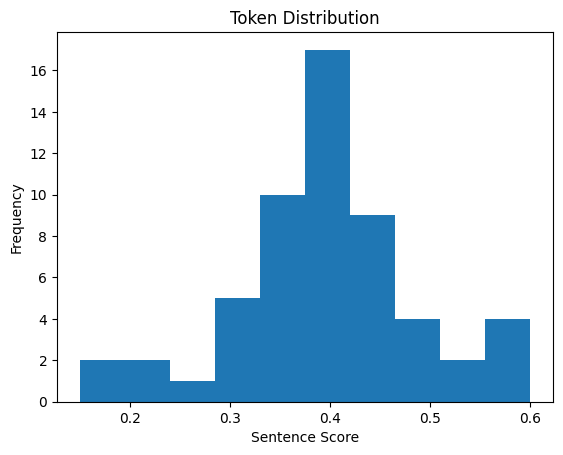

In [28]:
# Creating a List
token_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, wanted_tokens)
    token_scores.append(score)

# Plot
plt.hist(token_scores)
plt.title('Token Distribution')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of scores is between 3.5 - 4.5

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

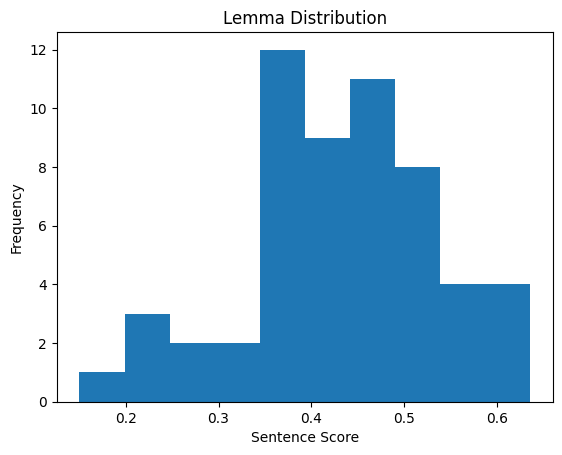

In [29]:
# Lemma List
lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, wanted_lemmas)
    lemma_scores.append(score)

plt.hist(lemma_scores)
plt.title('Lemma Distribution')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of scores is from 3.75 - 4.75

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [30]:
def tokens_only_nouns(token):
    nouns = ['NOUN', 'PRON', 'PROPN']
    return not (token.is_space or token.is_punct or token.is_stop or token.pos_ not in nouns)

noun_tokens = [token.text.lower() for token in doc if tokens_only_nouns(token)]

noun_count = Counter(noun_tokens)
noun_top_5 = noun_count.most_common(5)

print('The top 5 nouns and their frequency are:')
for token, count in noun_top_5:
    print(f'{token} - {count}')

The top 5 nouns and their frequency are:
laser - 35
headlights - 19
technology - 10
headlight - 9
beam - 7


#### Noun Analysis - Headlight and led are both missing from this list. I find this funny because led is really LED which stands for light-emiting diode and would therefore be considered a noun. 

In [31]:
lemmas = [token.lemma_.lower() for token in doc if tokens_only_nouns(token)]
lemma_nouns = Counter(lemmas)
wanted_noun_lemmas = lemma_nouns.most_common(5)

print('The top 5 lemmas and their frequncy are:')
for lemma, count in wanted_noun_lemmas:
    print(f'{lemma} - {count}')

The top 5 lemmas and their frequncy are:
laser - 40
headlight - 26
beam - 12
technology - 10
led - 7


#### Lemma Analysis - led is missing again which we established above is really meant to be LED. So it should appear on the list.